El laboratorio debe ser realizado dentro del plazo establecido por la tarea bajo las siguientes condiciones:

-   La hora de entrega final para el Lab será el día martes a las 23:00 hrs.
-   El laboratorio puede ser realizado en grupos siempre y cuando los nombres de todos los integrantes estén detallados en el documento entregado
-   El entregable es un archivo de jupyter notebook mediante la sección de tareas de U-Cursos, el archivo debe poder ser ejecutado sin errores de manera sequencial.

Nombres de integrantes del grupo:

    1.  Diego Irarrazaval

1- Explique como funciona el modelo KNN Regresor y los parámetros que debe setear para correr el modelo (0.5 pts)

Lo que hace es agrupar el nuevo dato con los vecinos cercanos tomando en cuenta las variables dependientes (_features_) y en funcion de estos vecinos, calcula un promedio de la variable independiente (_target_) de los vecinos para entregar una prediccion. 

Los principales parametros son:
- n_neighbors: Cantidad de vecinos a buscar para cada dato
- weights: `{‘uniform’, ‘distance’}`. Como se pondera el valor que aporta cada vecino.
  - `uniform` significa que independiente de las distancias, todos los vecinos aportan igual
  - `distance` significa que mientras mas lejos, menos aporta
- algorithm: algoritmo utilizado para computar (buscar) los vecinos
- leaf_size: dependiendo del algoritmo, en caso de ser del tipo arbol de busqueda se puede especificar el tamano de estos.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
housing_data = pd.read_csv('https://raw.githubusercontent.com/saguerraty/Aux-IN6531-/master/Lab%204/housing_data.csv')

# 2.
 Determine y limpie datos errados en caso de ser necesario y luego grafique la distribución así como el scatter plot de la variable 'SalePrice' Vs. al menos 10 variables contínuas que considere relvantes. Explique que de la información encontrada puede utilizar para construir o customizar sus modelos para predecir la variable 'SalePrice'.

In [3]:
print('El dataset tiene {} filas y {} columnas'.format(housing_data.shape[0],housing_data.shape[1]))
housing_data.head()

El dataset tiene 1460 filas y 47 columnas


,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,PoolArea,MoSold,YrSold,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,1Fam,2Story,7,5,2003,2003,Gable,Gd,TA,PConc,Gd,TA,706,150,856,GasA,Ex,Y,SBrkr,856,854,1710,2,1,3,1,Gd,8,0,2,548,61,0,2,2008,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,1Fam,1Story,6,8,1976,1976,Gable,TA,TA,CBlock,Gd,TA,978,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,0,3,1,TA,6,1,2,460,0,0,5,2007,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,1Fam,2Story,7,5,2001,2002,Gable,Gd,TA,PConc,Gd,TA,486,434,920,GasA,Ex,Y,SBrkr,920,866,1786,2,1,3,1,Gd,6,1,2,608,42,0,9,2008,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,1Fam,2Story,7,5,1915,1970,Gable,TA,TA,BrkTil,TA,Gd,216,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,3,1,Gd,7,1,3,642,35,0,2,2006,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,1Fam,2Story,8,5,2000,2000,Gable,Gd,TA,PConc,Gd,TA,655,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,1,4,1,Gd,9,1,3,836,84,0,12,2008,250000


In [4]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1460.0,729.500000,421.610009,0.0,364.75,729.5,1094.25,1459.0
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [5]:
housing_data.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'OpenPorchSF', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   MSSubClass    1460 non-null   int64 
 2   MSZoning      1460 non-null   object
 3   LotArea       1460 non-null   int64 
 4   Street        1460 non-null   object
 5   LotShape      1460 non-null   object
 6   LandContour   1460 non-null   object
 7   Utilities     1460 non-null   object
 8   LotConfig     1460 non-null   object
 9   LandSlope     1460 non-null   object
 10  BldgType      1460 non-null   object
 11  HouseStyle    1460 non-null   object
 12  OverallQual   1460 non-null   int64 
 13  OverallCond   1460 non-null   int64 
 14  YearBuilt     1460 non-null   int64 
 15  YearRemodAdd  1460 non-null   int64 
 16  RoofStyle     1460 non-null   object
 17  ExterQual     1460 non-null   object
 18  ExterCond     1460 non-null   object
 19  Founda

In [6]:
print(housing_data['Unnamed: 0'])

0          0
1          1
2          2
3          3
4          4
        ... 
1455    1455
1456    1456
1457    1457
1458    1458
1459    1459
Name: Unnamed: 0, Length: 1460, dtype: int64


La variable `Unnamed: 0` es equivalente al indice del dataframe. Esta sera eliminada. 

In [7]:
try:
  housing_data.drop('Unnamed: 0', axis=1 ,inplace=True)
except KeyError:
  print("Ya se elimino la columna 'Unnamed: 0'.")

Se debe graficar la distribucion de `SalePrice` vs 10 variables numericas. Para esto, se separan las variables numericas de las categoricas y las que corresponden a fechas (tomando en cuenta el archivo en `data_description.txt`).

In [8]:
numeric_vars = ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
                'HalfBath', 'BedroomAbvGr','KitchenAbvGr',  'TotRmsAbvGrd', 
                'Fireplaces','GarageCars','GarageArea', 'OpenPorchSF', 'PoolArea']
categorical_vars = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 
                    'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                    'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation',
                    'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir',
                    'Electrical', 'KitchenQual']
other = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
target = 'SalePrice'

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(target, col, df,reg = True, scale = False):
    '''
    Para variables numericas v/s una variable target. 
    Genera el scatterplot e histograma con distribucion de la variable a comparar.
    Recibe el nombre de la variable objetivo y la variablecon la cual se desea comparar.
    
    Args:
    --------
    target: String
        Nombre de la columna objetivo (eje y).
    col: String 
        Nombre de la columna que representara el eje x.
    reg: Bool
        Si se incluye o no una regresion lineal sobre los datos.
    scale: Bool
        Si se quiere o no escalar el eje y. Util cuando el rango de esta variable es muy grande. 
        
    Returns: None
        Muestra en pantalla dos graficos: Violin plot (similar al boxplot) y el histograma de 
        la variable col.
        
    Ejemplo de uso:
    --------------
    plot_scatter('price_per_m2','price')
    '''
       
    # Sirve para fija el tamaño de lasetiquetas del plot
    fontdict = {'fontsize':20}

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2,1,figsize=[10,10])

    # violin plot --> equivalente a catplot(kind = 'violin')
    if scale:
        if reg:
            sns.regplot(x = col,
                        y= target,
                        data=df,
                        ax=ax[0]).set_yscale("log")
            title = 'Scatter plot ' + col + ' v/s log(' + target + ') con ajuste lineal.'
            ax[0].set_title(title, fontdict,y=1.05)
        else:
            sns.scatterplot(x = col,
                            y=target,
                            data=df,
                            ax=ax[0]).set_yscale("log")
            title = 'Scatter plot ' + col + ' v/s log(' + target + ')'
            ax[0].set_title(title, fontdict,y=1.05)
    else:
        if reg:
            sns.regplot(x = col,
                        y= target,
                        data=df,
                        ax=ax[0])
            title = 'Scatter plot ' + col + ' v/s ' + target + ' con ajuste lineal.'
            ax[0].set_title(title, fontdict,y=1.05)
        else:
            sns.scatterplot(x = col,
                            y=target,
                            data=df,
                            ax=ax[0])
            title = 'Scatter plot ' + col + ' v/s ' + target
            ax[0].set_title(title, fontdict ,y=1.05)

    sns.distplot(df[col], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel(target, fontdict)
    
    title_y = "Frecuencias " + col
    ax[1].set_title(title_y, fontdict,y=1.05)
    

    h, w = (.6, .1)
    plt.subplots_adjust(wspace=w, hspace=h)

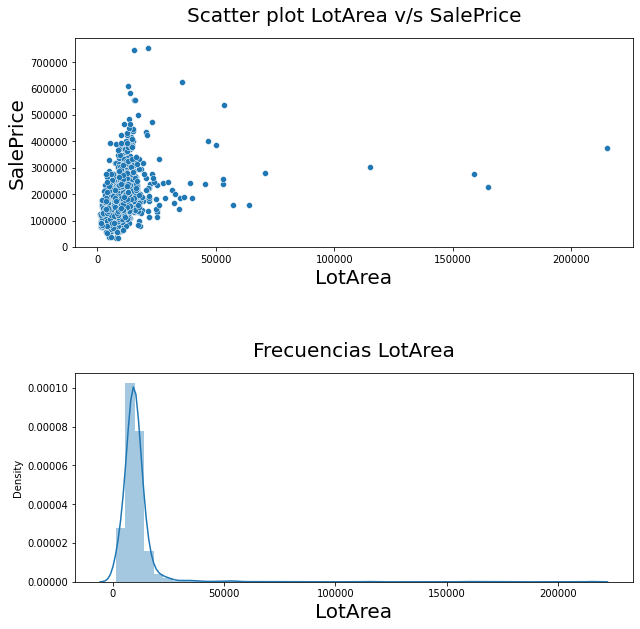

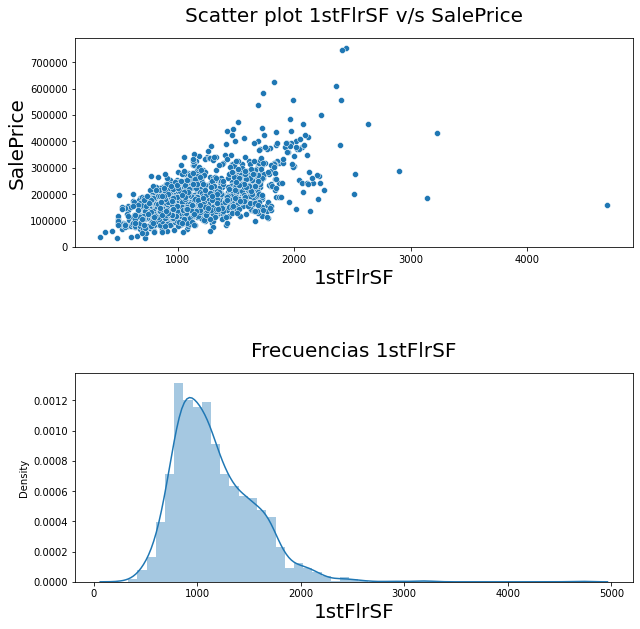

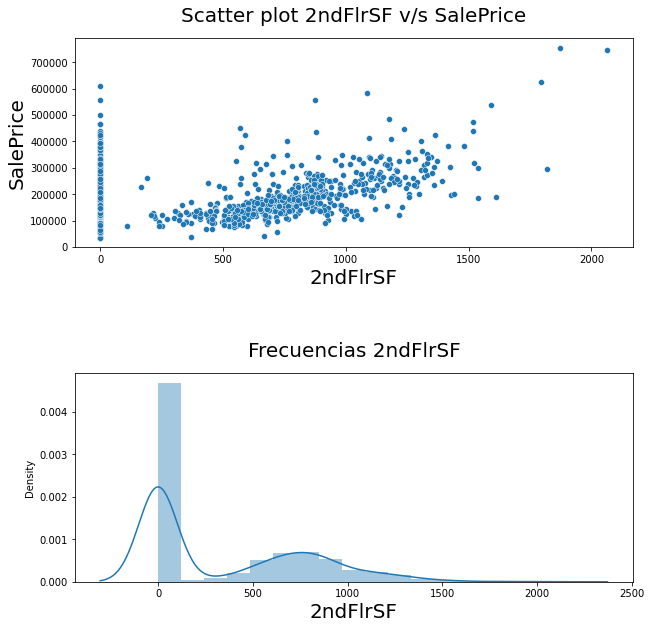

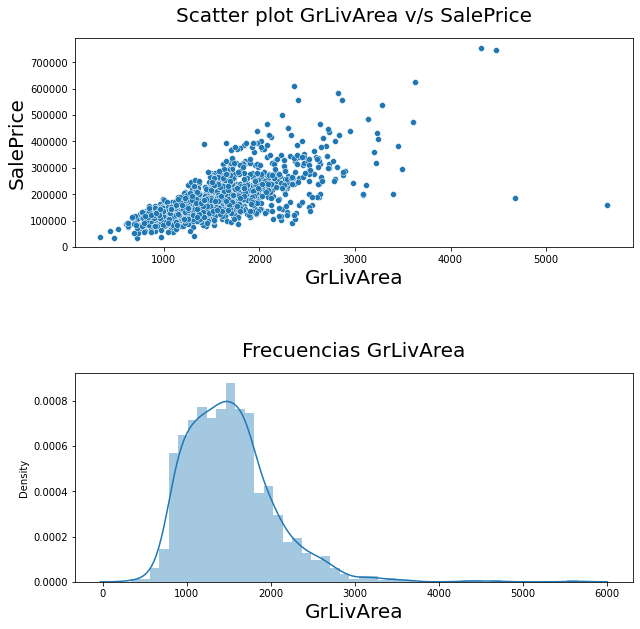

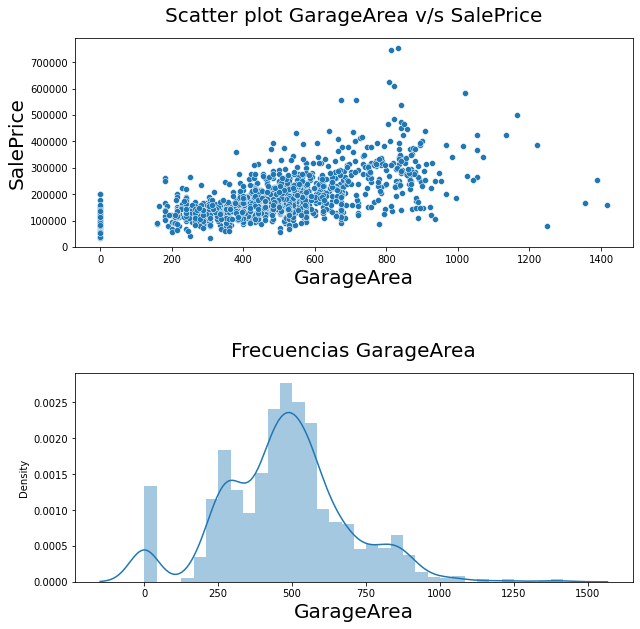

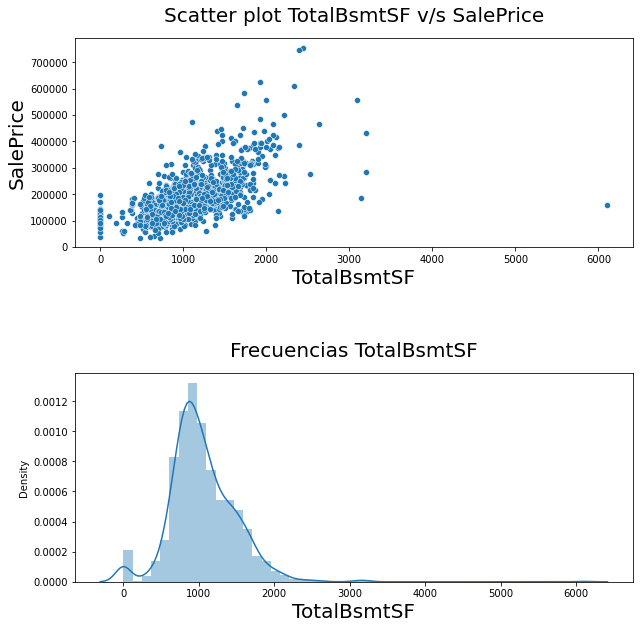

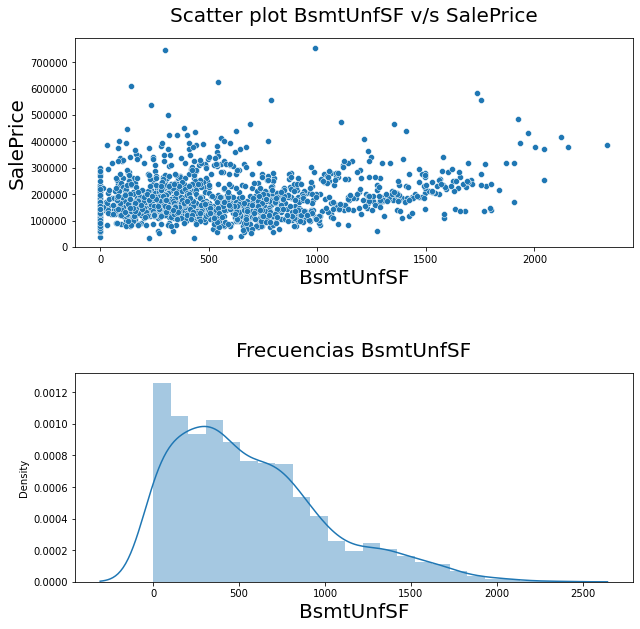

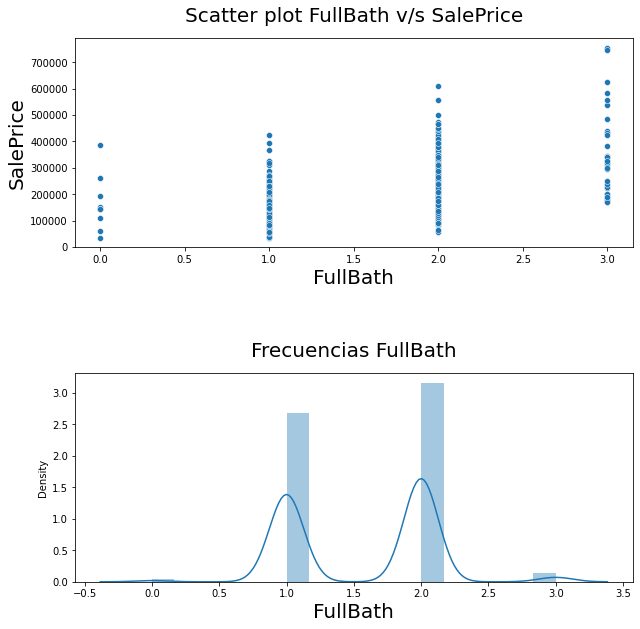

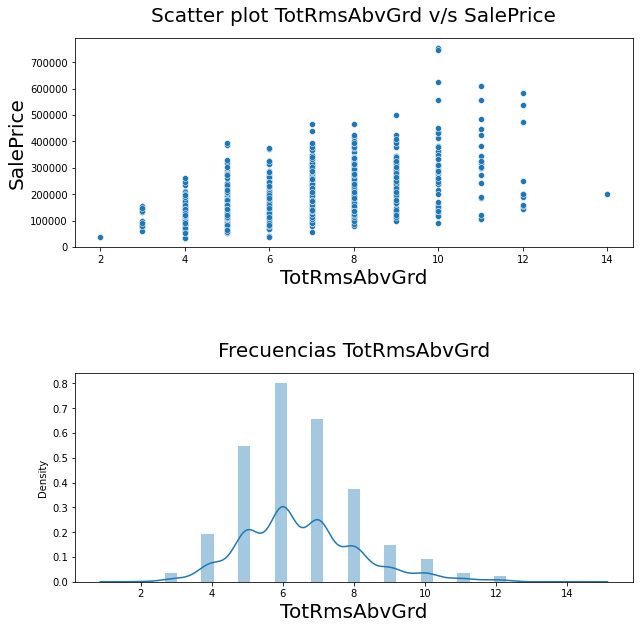

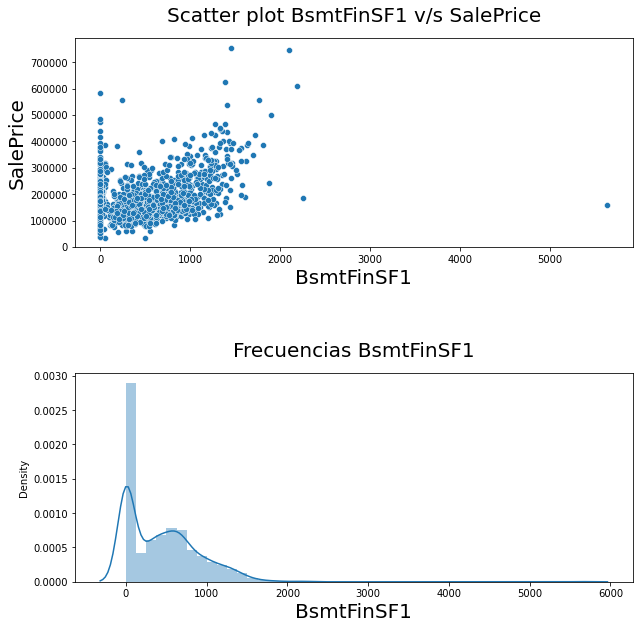

In [10]:
interes_numericas = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                    'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'FullBath',
                    'TotRmsAbvGrd', 'BsmtFinSF1']
for var in interes_numericas:
  plot_scatter(target, var, df = housing_data, reg=False)

En los graficos se observa para cada variable del arreglo `interes_numericas` el `scatter plot` vs la variable _target_ `SalePrice` y la distribucion (como histograma). 

Las variables de interes se eligieron observando los mismos graficos pero con todas las variables numericas disponibles (`numeric_vars`).

# 3.
Haga las transformaciones apropiadas a la tabla 'housing_data' para que pueda entrenar sus modelos, revise que no solo las variables en string representan variables categoricas. (0.5 pts)

In [17]:
# se eliminan los missing values ta que son pocos:
data = housing_data.dropna(axis=0, inplace=False)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
import numpy as np
# pipelines
cat_pipe = Pipeline(steps=[('encode', OneHotEncoder())])
std_pipe = Pipeline(steps=[('std_transform', StandardScaler())])
poly_pipe = Pipeline(steps=[('poly', PolynomialFeatures(3))])


# ¡Transformers, más de lo que ves!
col_transformer = ColumnTransformer(transformers=[('cat', cat_pipe, categorical_vars),
                                                  ('poly', poly_pipe, numeric_vars),
                                                  ('minmax', std_pipe, numeric_vars)])

In [19]:
col_transformer.fit_transform(data)

array([[ 0.        ,  0.        ,  0.        , ...,  0.3379938 ,
         0.20217764, -0.06960791],
       [ 1.        ,  0.        ,  0.        , ..., -0.07486375,
        -0.71274789, -0.06960791],
       [ 0.        ,  0.        ,  0.        , ...,  0.61948759,
        -0.08279917, -0.06960791],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.05070889,
         0.18717886, -0.06960791],
       [ 1.        ,  0.        ,  0.        , ..., -1.10700764,
        -0.71274789, -0.06960791],
       [ 1.        ,  0.        ,  0.        , ..., -0.93811137,
         0.30716909, -0.06960791]])

# 4.
Ajuste 5 modelos de regresión que le permitan predecir la variable 'SalePrice' utilizando algoritmos distintos para predecir la variable. Debe señalar de manera explicita las métricas (más de una) que usará para seleccionar un modelo a utlizar justificando su elección (para esto puede proponer supuestos sobre como se utilizará el modelo siempre y cuando sean razonables y plausibles). (1.5 pto)

Las metricas a utilizar son el error cuadratico medio que corresponde al error promedio de prediccion en el conjunto de test. Corresponde basicamente a la diferencia entre lo que se estima y el valor real. 

La otra es el coeficiente $R^2$. Usualmente se define como el coeficiente de correlacion de pearson al cuadrado y toma valores entre 0 y 1. En aplicaciones computacionales puede tomar valores negativos. 

Se espera que el error cuadratico medio sea el menor posible y que $R^2$ sea lo mas cercano a 1 posible. 

In [21]:
from sklearn.model_selection import train_test_split
cols_y = [target]
cols_X = numeric_vars + categorical_vars

X = housing_data.dropna()[cols_X]
X = col_transformer.fit_transform(X)
y = housing_data.dropna()[cols_y]

# ojo que hay nans
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Modelo BayesianRidge
from sklearn.linear_model import BayesianRidge

sklearn_bayesian = BayesianRidge()
modelo_sklearn = sklearn_bayesian.fit(X_train, y_train)
modelo_sklearn_y = modelo_sklearn.predict(X_test)
rmse_sk = np.sqrt(mean_squared_error(y_test, modelo_sklearn_y))
r_2_sk = r2_score(y_test, modelo_sklearn_y)
print('Modelo Bayesian Ridge')
print('Error cuadratico medio en test: {}. \n R^2 (coefficient of determination) en test: {}'.format(rmse_sk, r_2_sk))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modelo Bayesian Ridge
Error cuadratico medio en test: 445139.53181795427. 
 R^2 (coefficient of determination) en test: -32.54020274441525


In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
modelo_log_reg =  log_reg.fit(X_train, y_train)
modelo_log_reg_y = modelo_log_reg.predict(X_test)
rmse_log_reg = np.sqrt(mean_squared_error(y_test, modelo_log_reg_y))
r_2_log_reg = r2_score(y_test, modelo_log_reg_y)
print('='*30)
print('Modelo Regresion logistica')
print('Error cuadratico medio en test: {}. \n R^2 (coefficient of determination) en test: {}'.format(rmse_log_reg, r_2_log_reg))
print('='*30)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modelo Regresion logistica
Error cuadratico medio en test: 164601.67130934022. 
 R^2 (coefficient of determination) en test: -3.586082206497328


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
modelo_rf_regressor =  rf_regressor.fit(X_train, y_train)
modelo_rf_regressor_y = modelo_rf_regressor.predict(X_test)
rmse_rf_regressor = np.sqrt(mean_squared_error(y_test, modelo_rf_regressor_y))
r_2_rf_regressor = r2_score(y_test, modelo_rf_regressor_y)
print('='*30)
print('Modelo Random Forest Regressor')
print('Error cuadratico medio en test: {}. \n R^2 (coefficient of determination) en test: {}'.format(rmse_rf_regressor, r_2_rf_regressor))
print('='*30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Modelo Random Forest Regressor
Error cuadratico medio en test: 39997.737743420235. 
 R^2 (coefficient of determination) en test: 0.7292027740489085


In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()
modelo_knn_regressor =  knn_regressor.fit(X_train, y_train)
modelo_knn_regressor_y = modelo_knn_regressor.predict(X_test)
rmse_knn_regressor = np.sqrt(mean_squared_error(y_test, modelo_knn_regressor_y))
r_2_knn_regressor = r2_score(y_test, modelo_knn_regressor_y)
mae_knn_regressor = mean_absolute_error(y_test, modelo_knn_regressor_y)
print('='*30)
print('Modelo KNN Regressor')
print('Error cuadratico medio en test: {}. \n R^2 (coefficient of determination) en test: {}'.format(rmse_knn_regressor, r_2_knn_regressor))
print('Error absoluto medio del modelo: {}'.format(mae_knn_regressor))
print('='*30)

Modelo KNN Regressor
Error cuadratico medio en test: 51198.6157100009. 
 R^2 (coefficient of determination) en test: 0.5562996290535266
Error absoluto medio del modelo: 32322.103859649127


In [34]:
from sklearn import svm

svm_r = svm.SVR()
modelo_svm_r =  svm_r.fit(X_train, y_train)
modelo_svm_r_y = modelo_svm_r.predict(X_test)
rmse_svm_r = np.sqrt(mean_squared_error(y_test, modelo_svm_r_y))
r_2_svm_r = r2_score(y_test, modelo_svm_r_y)
print('='*30)
print('Modelo Support Vector Machine Regressor')
print('Error cuadratico medio en test: {}. \n R^2 (coefficient of determination) en test: {}'.format(rmse_svm_r, r_2_svm_r))
print('='*30)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Modelo Support Vector Machine Regressor
Error cuadratico medio en test: 78303.18141213122. 
 R^2 (coefficient of determination) en test: -0.037844215803819026


# 5.
Un colega le dice que según su experiencia el modelo KNN regresor debería tener un mejor rendimiento de lo que le da el modelo que entrenó. Busque una configuración que le entregue mejores valores para las metricas de error MAE y RMSE. En base a su modelo nuevo determine bajo que situaciones prefiere su modelo original y cuando preferiría utilizar su modelo de KNN optimizado. Justifique su respuesta. (1.5 pto)

(le puede ser útil saber que los parámetros para la configuración óptima de KNN en esta aplicación continen los valores: p=1, y leaf_size= 33, además puede demorarse menos en ajustar el modelo si setea el parámetro n_jobs= -1, esto puede hacer que su computador no lo deje hacer otra cosa mientras entrena su modelo, usar con cuidado)

Para encontrar el mejor modelo, se hara una busqueda de grilla donde se incluiran los parametros que se mencionan en el _hint_:

In [41]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_neighbors': [1,3,5,10],
              'weights': ['uniform', 'distance'],
              'leaf_size': [33],
              'p':[1,2]
              }


knn = KNeighborsRegressor(metric='euclidean')
gscv = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='euclidean',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [33], 'n_neighbors': [1, 3, 5, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
# Parametros obtenidos:
print(gscv.best_params_)

{'leaf_size': 33, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Notemos que los parametros obtenidos coinciden con los mencionados en el _hint_. 

In [46]:
from sklearn.metrics import mean_absolute_error

knn_regressor_final = gscv.best_estimator_
modelo_knn_regressor_final =  knn_regressor_final.fit(X_train, y_train)
modelo_knn_regressor_final_y = modelo_knn_regressor_final.predict(X_test)
rmse_knn_regressor_final = np.sqrt(mean_squared_error(y_test, modelo_knn_regressor_final_y))
r_2_knn_regressor_final = r2_score(y_test, modelo_knn_regressor_final_y)
mae_final = mean_absolute_error(y_test, modelo_knn_regressor_final_y)
print('='*30)
print('Modelo KNN Regressor')
print('Error cuadratico medio en test: {}. \n R^2 (coefficient of determination) en test: {}. \nError absoluto medio obtenido: {}'.format(rmse_knn_regressor_final, r_2_knn_regressor_final,mae_final))
print('='*30)

Modelo KNN Regressor
Error cuadratico medio en test: 51303.57356324461. 
 R^2 (coefficient of determination) en test: 0.5544785808798537. 
Error absoluto medio obtenido: 32021.502527661767


In [49]:
# Comparemos los resultados del regresor obtenido con la busqueda vs el generado por defect:
print('='*30)
print('RMSE Mejor Modelo: {}'.format(rmse_knn_regressor_final))
print('RMSE Modelo por defecto: {}'.format(rmse_knn_regressor))
print('='*30)
print('R^2 Mejor Modelo: {}'.format(r_2_knn_regressor_final))
print('R^2 Modelo por defecto: {}'.format(r_2_knn_regressor))
print('='*30)
print('MAE Mejor Modelo: {}'.format(mae_final))
print('MAE Modelo por defecto: {}'.format(mae_knn_regressor))

RMSE Mejor Modelo: 51303.57356324461
RMSE Modelo por defecto: 51198.6157100009
R^2 Mejor Modelo: 0.5544785808798537
R^2 Modelo por defecto: 0.5562996290535266
MAE Mejor Modelo: 32021.502527661767
MAE Modelo por defecto: 32322.103859649127


Observemos que no hay una mejora. De hecho, el error cuadratico medio y el coeficiente $R^2$ empeoran en comparacion con el modelo con parametros por defecto. 
La metrica _MAE_ si mejora en el modelo obtenido con la busqueda de grilla.  

#6. 
 Mencione y explique dos alternativas que puede usar para evaluar la robustez de su modelo elegido. (0.5 pts)

Propuestas:

1. Mejorar la seleccion de hyperparametros realizando busquedas _GridSearch_ sobre distintos modelos y con mas variedad de posibles parametros. 

2. Se puede hacer una especie de _data augmentation_: al hacer distintas combinaciones polinomiales de las variables numericas se pueden crear nuevas caracteristicas para tener a partir de la misma base de datos, mas variables. 

Lo descrito en el punto 2 se implementa en el laboratorio en las siguientes lineas:
```
# Se define el generador de caracteristicas polinomial
poly_pipe = Pipeline(steps=[('poly', PolynomialFeatures(3))])


# ¡Transformers, más de lo que ves!
col_transformer = ColumnTransformer(transformers=[('cat', cat_pipe, categorical_vars),
                                                  ('poly', poly_pipe, numeric_vars), # Se aplica en el pipeline
                                                  ('minmax', std_pipe, numeric_vars)])
```

# 7.
 Explique como cambiaría su decisión de qué modleo implementar si es que lo tiene que implementar en estos dos casos:

    -   Trabaja en una aseguradora y le piden determinar el precio de las vivendas de sus clientes para el producto de seguros contra incendios
    -   Trabaja en la organización del país que vela por el pago de impuesto de contribuciones y le piden estimar el valor comercial de las viviendas, considere que en caso de sobre estimar esto, los propietaros reclaman y se puede re-evaluar la valoración.

En particular, expliqué que aspecto de su modelo evaluaría para determinar si el modelo se ajusta a su aplicación en cada caso, no es necesario implementar la evaluación pero si detallar como lo haría y como el análisis cambia para cada caso. (0.5 pts)


1. La eleccion del modelo en si mismo no variaria en el primer caso pero si se haria un estudio de como afecta la variacion de las siguientes dos variables: `['Fireplaces', 'FireplaceQu']`. El modelo no debiese variar porque se pide determinar el precio de la vivienda. Esto no se ve afectado (o no debiese verse afectado) por el uso de esta estimacion. 

2. Tal vez pensar en un modelo donde se penalize mas los errores que sean 'positivos': si la prediccion es mayor al valor real en entrenamiento, penalizar mas que si la estimacion esta bajo el valor real. 
Esto de todas formas puede sugnificar sub-estimar constantemente, lo que tambien puede ser negativo ya que se pagaran menos impuestos de los que se debiesen pagar pero los clientes reclamaran menos. 
